# Text Cluster Analysis

Text clustering is the application of cluster analysis to text-based documents. It uses machine learning and natural language processing (NLP) to understand and categorize unstructured, textual data. How it works. Typically, descriptors (sets of words that describe topic matter) are extracted from the document first.

In [1]:
import pandas as pd
import gensim
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,HashingVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import re

In [2]:
# this will slove broken link issue with nltk using ssl.
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [3]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/saikumaryava/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saikumaryava/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### The Data
[bbc-fulltext-and-category](https://www.kaggle.com/yufengdev/bbc-fulltext-and-category).

In [4]:
data = pd.read_csv('bbc-text.csv');

In [8]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [9]:
data.shape

(2225, 2)

### Data Pre-processing
We will perform the following steps:

* **Tokenization**: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
* Words that have fewer than 3 characters are removed.
* All **stopwords** are removed.
* Words are **lemmatized** — words in third person are changed to first person and verbs in past and future tenses are changed into present.
* Words are **stemmed** — words are reduced to their root form.

In [7]:
# perform lemmatize and stem preprocessing steps on the data set.
stemmer = SnowballStemmer(language='english',ignore_stopwords=True)
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return ' '.join(result)

In [12]:
# Preprocess the headline text, saving the results as ‘processed_docs’
processed_docs = data['text'].map(preprocess)
processed_docs.head(10)

0    futur hand viewer home theatr system plasma hi...
1    worldcom boss leav book worldcom boss berni eb...
2    tiger wari farrel gambl leicest rush make andi...
3    yead face newcastl premiership newcastl unit f...
4    ocean raid offic ocean crime caper sequel star...
5    howard hit mongrel jibe michael howard say cla...
6    blair prepar poll date toni blair like elect p...
7    henman hop end dubai seed henman slump straigh...
8    wilkinson face edinburgh england captain jonni...
9    star war children sixth final star war movi su...
Name: text, dtype: object

### Feature Extraction

#### Count Vectors

In [14]:
# Count Vectors as features
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(processed_docs)

# transform the training and validation data using count vectorizer object
count_vec =  count_vect.transform(processed_docs)

In [15]:
from sklearn.cluster import KMeans

In [17]:
# Let us take with K = 5
final_model=KMeans(5)
final_model.fit(count_vec)
prediction=final_model.predict(count_vec)

In [18]:
data["clusters"] = prediction

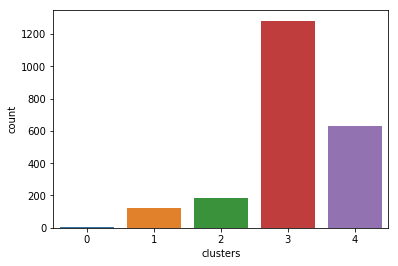

In [20]:
# counts of the clusters
sns.countplot(data["clusters"])

In [23]:
data[data["clusters"] == 0].head()

,category,text,clusters
865,entertainment,brits debate over urban music joss stone a ...,0
1615,entertainment,scissor sisters triumph at brits us band sciss...,0


In [26]:
data[data["clusters"] == 1].head()

,category,text,clusters
0,tech,tv future in the hands of viewers with home th...,1
21,tech,halo 2 heralds traffic explosion the growing p...,1
24,tech,mobile audio enters new dimension as mobile ph...,1
27,tech,mobile gig aims to rock 3g forget about going ...,1
149,tech,the future in your pocket if you are a geek or...,1


In [27]:
data[data["clusters"] == 2].head()

,category,text,clusters
5,politics,howard hits back at mongrel jibe michael howar...,2
6,politics,blair prepares to name poll date tony blair is...,2
38,politics,debate needed on donations cap a cap on donat...,2
47,politics,campaign cold calls questioned labour and th...,2
51,politics,strike threat over pension plans millions of p...,2
